In [73]:
# dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [74]:
# load in csv files
cities_df = pd.read_csv("city_data.csv")
rides_df = pd.read_csv("ride_data.csv")


In [75]:
# merge datasets
merged_df = pd.merge(rides_df, cities_df, how='inner', on='city')
merged_df.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [76]:
#define how key variables will be visualized

#x = total number of drivers per city
#y = total number of rides per city
#color = city category 
#size of plot = average fare per city
#fare = plot points

In [77]:
a= cities_df['driver_count']
t = merged_df['type']
x = merged_df.groupby(['type', 'city']).count()['ride_id']
y = round(merged_df.groupby(['type', 'city']).mean()['fare'],2)


In [78]:
# create variables for the city types on each axis
xu = x['Urban']
xs = x['Suburban']
xr = x['Rural']
yu = y['Urban']
ys = y['Suburban']
yr = y['Rural']


In [79]:
# set labels, colors, and plot size
labels = 'Rural', 'Suburban', 'Urban'
colors = ['lightcoral', 'lightskyblue', 'gold']
plt.rcParams["figure.figsize"]=[12,8]

In [80]:
# create bubbleplot
fig = plt.figure()
ax = fig.add_subplot(111) 
ax.set(title ='Pyber Data Bubble Plot', ylabel = 'Average Fare ($) Per City', xlabel = 'Total Number of Rides Per City')
rural = ax.scatter(xr,yr, s=a*5, color = 'lightcoral', alpha = 0.5, linewidth = 5)
suburban = ax.scatter(xs,ys, s=a*5, color = 'lightskyblue', alpha = 0.5, linewidth = 5)
urban = ax.scatter(xu,yu, s=a*5, color = 'gold', alpha = 0.5, linewidth = 5)
plt.legend(('Rural', 'Suburban', 'Urban'),loc = 'best', prop= {'size': 12})

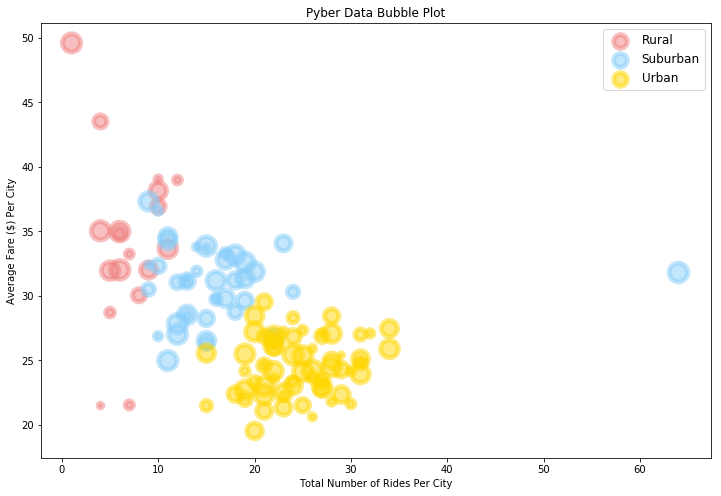

In [81]:
# show bubbleplot
fig


In [85]:
# # find total of fares of rides by type
merged_df.groupby(['type']).sum()['fare']

type
Rural        4255.09
Suburban    20335.69
Urban       40078.34
Name: fare, dtype: float64

In [92]:
# create labels, sizes (data comes from above grouping), colors and seperation
labels = ["Rural", "Suburban", "Urban"]
sizes = [4255.09, 20355.69, 40078.34]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05)

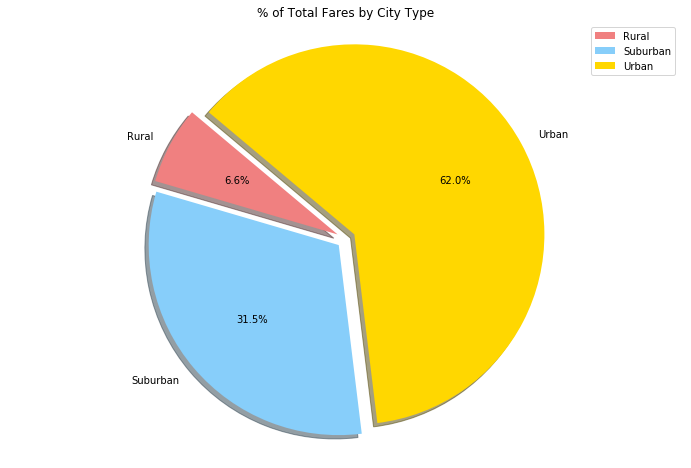

In [94]:
# create pie chart to visualize the data
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)
plt.axis("equal")
plt.legend(loc=1)
plt.title("% of Total Fares by City Type")
plt.show()

In [96]:
# # find total of fares of rides by type
merged_df.groupby(['type']).count()['ride_id']


type
Rural        125
Suburban     657
Urban       1625
Name: ride_id, dtype: int64

In [98]:
# create labels, sizes (data comes from above grouping), colors and seperation
labels = ["Rural", "Suburban", "Urban"]
sizes = [125, 657, 1625]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05)

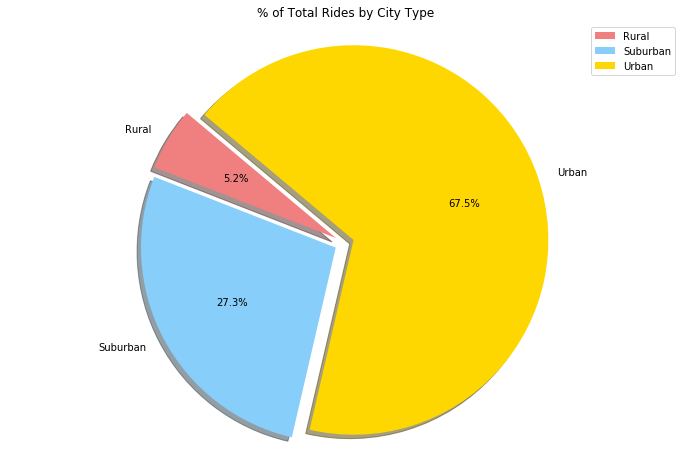

In [99]:
# create pie chart to visualize the data
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)
plt.axis("equal")
plt.legend(loc=1)
plt.title("% of Total Rides by City Type")
plt.show()

In [100]:
# # find total of drivers of rides by city type
merged_df.groupby(['type']).sum()['driver_count']


type
Rural         727
Suburban     9730
Urban       64501
Name: driver_count, dtype: int64

In [102]:
# create labels, sizes (data comes from above grouping), colors and seperation
labels = ["Rural", "Suburban", "Urban"]
sizes = [727, 9730, 64501]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode = (0.05, 0.05, 0.05)

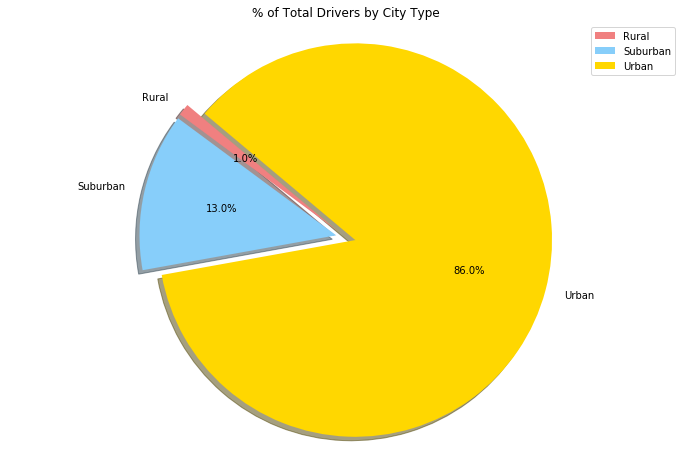

In [103]:
# create pie chart to visualize the data
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle = 140)
plt.axis("equal")
plt.legend(loc=1)
plt.title("% of Total Drivers by City Type")
plt.show()